In [1]:
#The linear regression model observing responsiveness of Average Crime Rate to changes in State Unemployment Rate is statistically significant. P value is 5.987422407746846e-14.
#There is a weak to moderately positive correlation between Average Crime Rate and State Unemployment Rate. R-squared is 0.183.
#R-squared is the coefficient of determination of how much of the total variation in Avg Crime rate is explained by the variation in State Unemployment.
#This linear relationship is best described by the formula y = 91.8468X - 85.4136, representing the regression line.
#

In [2]:
# Import Dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats
# Reference the crime data file where the CSV is located, read and import the data into a pandas DataFrame
crimedf = pd.read_csv('crime_data.csv')

# Display first 5 rows of the data
crimedf.head()

,county_name,State,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,St. Louis city,MO,1791.995377,1,1,4,1612,318667,318667,15,...,200,1778,3609,4995,13791,3543,464,318416,29,510
1,Crittenden County,AR,1754.914968,2,1,4,130,50717,50717,4,...,38,165,662,1482,1753,189,28,49746,5,35
2,Alexander County,IL,1664.700485,3,1,4,604,8040,8040,2,...,2,5,119,82,184,12,2,7629,17,3
3,Kenedy County,TX,1456.310680,4,1,4,2681,444,444,1,...,3,1,2,5,4,4,0,412,48,261
4,De Soto Parish,LA,1447.402430,5,1,4,1137,26971,26971,3,...,4,17,368,149,494,60,0,27083,22,31


In [3]:
# Display column headings
crimedf.columns

Index(['county_name', 'State', 'crime_rate_per_100000', 'index', 'EDITION',
       'PART', 'IDNO', 'CPOPARST', 'CPOPCRIM', 'AG_ARRST', 'AG_OFF', 'COVIND',
       'INDEX', 'MODINDX', 'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY',
       'LARCENY', 'MVTHEFT', 'ARSON', 'population', 'FIPS_ST', 'FIPS_CTY'],
      dtype='object')

In [4]:
# Display data types for each column
crimedf.dtypes

county_name               object
State                     object
crime_rate_per_100000    float64
index                      int64
EDITION                    int64
PART                       int64
IDNO                       int64
CPOPARST                   int64
CPOPCRIM                   int64
AG_ARRST                   int64
AG_OFF                     int64
COVIND                   float64
INDEX                      int64
MODINDX                    int64
MURDER                     int64
RAPE                       int64
ROBBERY                    int64
AGASSLT                    int64
BURGLRY                    int64
LARCENY                    int64
MVTHEFT                    int64
ARSON                      int64
population                 int64
FIPS_ST                    int64
FIPS_CTY                   int64
dtype: object

In [5]:
# Find null values in the dataframe. No null values observed.
np.where(pd.isnull(crimedf))

(array([], dtype=int64), array([], dtype=int64))

In [6]:
# Identify incomplete rows
crimedf.count()

county_name              3136
State                    3136
crime_rate_per_100000    3136
index                    3136
EDITION                  3136
PART                     3136
IDNO                     3136
CPOPARST                 3136
CPOPCRIM                 3136
AG_ARRST                 3136
AG_OFF                   3136
COVIND                   3136
INDEX                    3136
MODINDX                  3136
MURDER                   3136
RAPE                     3136
ROBBERY                  3136
AGASSLT                  3136
BURGLRY                  3136
LARCENY                  3136
MVTHEFT                  3136
ARSON                    3136
population               3136
FIPS_ST                  3136
FIPS_CTY                 3136
dtype: int64

In [7]:
# Display an overview of the State Column to ensure uniform format and style for each state
crimedf["State"].value_counts()


 TX    254
 GA    159
 VA    134
 KY    120
 MO    115
 KS    105
 IL    102
 NC    100
 IA     99
 TN     95
 NE     93
 IN     92
 OH     88
 MN     87
 MI     83
 MS     82
 OK     77
 AR     75
 WI     72
 PA     67
 FL     67
 AL     67
 SD     66
 CO     64
 LA     64
 NY     62
 CA     58
 MT     56
 WV     55
 ND     53
 SC     46
 ID     44
 WA     39
 OR     36
 NM     32
 UT     29
 MD     24
 AK     23
 WY     23
 NJ     21
 NV     17
 ME     16
 AZ     15
 VT     14
 MA     14
 NH     10
 CT      8
 RI      5
 HI      5
 DE      3
 DC      1
Name: State, dtype: int64

In [8]:
# Display a statistical overview of the data
crimedf.describe()

,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,COVIND,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
count,3136.000000,3136.000000,3136.0,3136.0,3136.000000,3.136000e+03,3.136000e+03,3136.000000,3136.000000,3136.000000,...,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3.136000e+03,3136.000000,3136.000000
mean,235.085665,1568.500000,1.0,4.0,1590.655612,9.977578e+04,9.841005e+04,6.201212,5.400510,98.154624,...,26.324936,112.447704,238.644133,660.654337,1923.397959,227.536671,16.765625,1.007329e+05,30.339286,103.628827
std,200.502872,905.429548,0.0,0.0,916.038464,3.198554e+05,3.189017e+05,8.104974,7.532491,8.311058,...,79.309098,666.311425,931.091864,2242.359745,6435.993731,1253.236660,67.970823,3.226566e+05,15.112433,107.987364
min,0.000000,1.000000,1.0,4.0,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+01,1.000000,1.000000
25%,94.641916,784.750000,1.0,4.0,797.750000,1.120325e+04,1.013975e+04,2.000000,2.000000,100.000000,...,1.000000,0.000000,10.000000,37.000000,81.000000,6.000000,0.000000,1.109275e+04,19.000000,35.000000
50%,185.948066,1568.500000,1.0,4.0,1588.500000,2.596550e+04,2.478250e+04,4.000000,3.000000,100.000000,...,5.000000,4.000000,36.000000,131.000000,348.500000,22.000000,3.000000,2.581250e+04,29.000000,79.000000
75%,321.367803,2352.250000,1.0,4.0,2385.250000,6.628100e+04,6.603775e+04,7.000000,6.000000,100.000000,...,19.000000,22.000000,124.000000,416.500000,1205.250000,74.000000,9.000000,6.758225e+04,45.000000,133.000000
max,1791.995377,3136.000000,1.0,4.0,3177.000000,9.980757e+06,9.980757e+06,150.000000,140.000000,100.000000,...,1976.000000,18923.000000,23057.000000,49107.000000,142604.000000,40555.000000,2210.000000,1.001707e+07,56.000000,840.000000


In [9]:
# Group data by State and produce a relevant dataframe in preparation to find a relationship between average crime rate and state unemployment rate
crimemod = crimedf.groupby("State")
state_crimerate = crimemod["crime_rate_per_100000"].mean().round(0)
newcrimedf=pd.DataFrame({"Average Crime Rate": state_crimerate})

# Display new dataframe
newcrimedf

,Average Crime Rate
State,
AK,289.0
AL,386.0
AR,335.0
AZ,353.0
CA,416.0
CO,182.0
CT,181.0
DC,1217.0
DE,524.0


In [10]:
#Display statistical overview of new Crime dataframe
newcrimedf.describe()


,Average Crime Rate
count,51.000000
mean,264.666667
std,180.948796
min,62.000000
25%,156.000000
50%,222.000000
75%,344.000000
max,1217.000000


In [11]:
newcrimedf.count()

Average Crime Rate    51
dtype: int64

In [12]:
#Reference the unemployment data file where the CSV is located, read and import the data into a pandas DataFrame
unemploymentdf = pd.read_csv('unemployment.csv')

#Display the unemployment data frame
unemploymentdf.head()

,LAUS Code,State FIPS Code,County FIPS Code,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%),County Name/State Abbreviation,State
0,CN0201300000000,2,13,2018,"2,321","2,252",69,3.0,Aleutians East Borough,AK
1,CN0201600000000,2,16,2018,"3,615","3,487",128,3.5,Aleutians West Census Area,AK
2,CN0202000000000,2,20,2018,"151,950","143,602","8,348",5.5,Anchorage Borough/municipality,AK
3,CN0205000000000,2,50,2018,"7,400","6,455",945,12.8,Bethel Census Area,AK
4,CN0206000000000,2,60,2018,441,413,28,6.3,Bristol Bay Borough,AK


In [13]:
#Display all column headings
unemploymentdf.columns

Index(['LAUS Code', 'State FIPS Code', 'County FIPS Code', 'Year',
       'Labor Force', 'Employed', 'Unemployed', 'Unemployment Rate (%)',
       'County Name/State Abbreviation', 'State'],
      dtype='object')

In [14]:
#Display statistical overview of unemployment dataframe
unemploymentdf.describe()

,State FIPS Code,County FIPS Code,Year,Unemployment Rate (%)
count,3219.000000,3219.000000,3219.0,3219.000000
mean,31.295744,102.952470,2018.0,4.302889
std,16.277202,106.696455,0.0,1.894238
min,1.000000,1.000000,2018.0,1.300000
25%,19.000000,35.000000,2018.0,3.100000
50%,30.000000,79.000000,2018.0,3.900000
75%,46.000000,133.000000,2018.0,4.900000
max,72.000000,840.000000,2018.0,19.900000


In [15]:
#Display data types to check why some columns did not show up when we called a statistical overview
unemploymentdf.dtypes

LAUS Code                          object
State FIPS Code                     int64
County FIPS Code                    int64
Year                                int64
Labor Force                        object
Employed                           object
Unemployed                         object
Unemployment Rate (%)             float64
County Name/State Abbreviation     object
State                              object
dtype: object

In [16]:
#Convert Labor Force and Unemployed Series from object to numeric and remove the commas
convertedunemploymentdf=unemploymentdf.copy()
convertedunemploymentdf["Unemployed"]=pd.to_numeric(convertedunemploymentdf["Unemployed"].str.replace(",",""))
convertedunemploymentdf["Labor Force"]=pd.to_numeric(convertedunemploymentdf["Labor Force"].str.replace(",",""))


In [17]:
#Verify that data type for Labor Force and Unemployed Series has changed to numeric.
convertedunemploymentdf.dtypes


LAUS Code                          object
State FIPS Code                     int64
County FIPS Code                    int64
Year                                int64
Labor Force                         int64
Employed                           object
Unemployed                          int64
Unemployment Rate (%)             float64
County Name/State Abbreviation     object
State                              object
dtype: object

In [18]:
#Display first 5 rows of data and check if the commas have been removed
convertedunemploymentdf.head()

,LAUS Code,State FIPS Code,County FIPS Code,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%),County Name/State Abbreviation,State
0,CN0201300000000,2,13,2018,2321,"2,252",69,3.0,Aleutians East Borough,AK
1,CN0201600000000,2,16,2018,3615,"3,487",128,3.5,Aleutians West Census Area,AK
2,CN0202000000000,2,20,2018,151950,"143,602",8348,5.5,Anchorage Borough/municipality,AK
3,CN0205000000000,2,50,2018,7400,"6,455",945,12.8,Bethel Census Area,AK
4,CN0206000000000,2,60,2018,441,413,28,6.3,Bristol Bay Borough,AK


In [19]:
#Group the unemployment dataframe by State and sum all columns
unemploymentmod = convertedunemploymentdf.groupby(["State"]).sum()

#Display new dataframe
unemploymentmod.head()


,State FIPS Code,County FIPS Code,Year,Labor Force,Unemployed,Unemployment Rate (%)
State,,,,,,
AK,58,4340,58522,356886,23510,251.9
AL,67,4489,135206,2198844,86493,300.9
AR,375,5625,151350,1351498,50038,318.8
AZ,60,208,30270,3439758,166205,100.7
CA,348,3364,117044,19398212,815409,303.9


In [20]:
# Check for incomplete rows
unemploymentmod.count()

State FIPS Code          52
County FIPS Code         52
Year                     52
Labor Force              52
Unemployed               52
Unemployment Rate (%)    52
dtype: int64

In [21]:
# Drop unnecessary columns, compute for State Unemployment Rate and add this column to the new unemployment dataframe
newunemploymentdf = unemploymentmod.drop(["State FIPS Code","County FIPS Code","Year","Unemployment Rate (%)"], axis=1)
newunemploymentdf["State Unemployment Rate (%)"] = ((newunemploymentdf["Unemployed"] / newunemploymentdf["Labor Force"])*100).round(2)

# Display new unemployment dataframe
newunemploymentdf

,Labor Force,Unemployed,State Unemployment Rate (%)
State,,,
AK,356886,23510,6.59
AL,2198844,86493,3.93
AR,1351498,50038,3.70
AZ,3439758,166205,4.83
CA,19398212,815409,4.20
CO,3096364,101608,3.28
CT,1905313,78243,4.11
DC,404610,22470,5.55
DE,482465,18128,3.76


In [22]:
# Merge both relevant crime and unemployment dataframes by implementing a left join
# This drops the extra row in the newunemployment dataframe
mergeddf = pd.merge(newcrimedf,newunemploymentdf,
                    how = 'left', on ='State')

# Display merged dataframe
mergeddf

,Average Crime Rate,Labor Force,Unemployed,State Unemployment Rate (%)
State,,,,
AK,289.0,356886,23510,6.59
AL,386.0,2198844,86493,3.93
AR,335.0,1351498,50038,3.70
AZ,353.0,3439758,166205,4.83
CA,416.0,19398212,815409,4.20
CO,182.0,3096364,101608,3.28
CT,181.0,1905313,78243,4.11
DC,1217.0,404610,22470,5.55
DE,524.0,482465,18128,3.76


In [23]:
mergeddf.to_csv('crime_and_unemployment.csv', index=True)


In [24]:
# Illustrate the dropped row by implementing a "right" join
# The last row shows PR or Puerto Rico, an American Territory. It has a null value for average crime rate and confirms the left join was the appropriate method to merge the data.
speculatemergeddf = pd.merge(newcrimedf,newunemploymentdf,
                    how = "right", on = "State")
speculatemergeddf

,Average Crime Rate,Labor Force,Unemployed,State Unemployment Rate (%)
State,,,,
AK,289.0,356886,23510,6.59
AL,386.0,2198844,86493,3.93
AR,335.0,1351498,50038,3.70
AZ,353.0,3439758,166205,4.83
CA,416.0,19398212,815409,4.20
CO,182.0,3096364,101608,3.28
CT,181.0,1905313,78243,4.11
DC,1217.0,404610,22470,5.55
DE,524.0,482465,18128,3.76


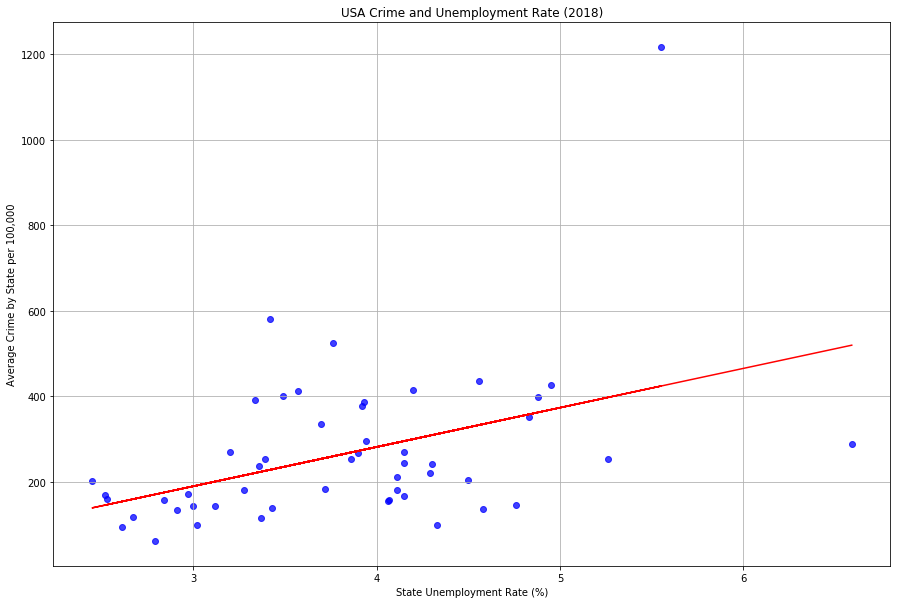

In [25]:
# Create a scatter plot with linear regression. 
figsize_x = 15
figsize_y = 10

figsize, ax1 = plt.subplots(figsize=(figsize_x, figsize_y))
plt.scatter(mergeddf["State Unemployment Rate (%)"], mergeddf["Average Crime Rate"], marker="o", facecolors="blue", 
             alpha=0.75)

plt.title ('USA Crime and Unemployment Rate (2018)')
plt.xlabel ('State Unemployment Rate (%)')
plt.ylabel ('Average Crime by State per 100,000')
plt.grid()


x = mergeddf["State Unemployment Rate (%)"]
y = mergeddf["Average Crime Rate"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, 'r')
# Save scatter plot
plt.savefig("2018 USA Crime and Unemployment Scatter Plot with Regression Line.png")

In [26]:
# Perform a t-test
stats.ttest_ind(mergeddf["Average Crime Rate"],mergeddf["State Unemployment Rate (%)"], equal_var=False)

Ttest_indResult(statistic=10.29494437294352, pvalue=5.987422407746846e-14)

In [27]:
# Import statsmodels
import statsmodels.api as sm


In [28]:
# Define X and y to create an OLS Regression
X = mergeddf[["State Unemployment Rate (%)"]]
y = mergeddf["Average Crime Rate"]
X

,State Unemployment Rate (%)
State,
AK,6.59
AL,3.93
AR,3.70
AZ,4.83
CA,4.20
CO,3.28
CT,4.11
DC,5.55
DE,3.76


In [29]:
# Add a constant
X = sm.add_constant(X)
X

C:\Users\cabel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,State Unemployment Rate (%)
State,,
AK,1.0,6.59
AL,1.0,3.93
AR,1.0,3.70
AZ,1.0,4.83
CA,1.0,4.20
CO,1.0,3.28
CT,1.0,4.11
DC,1.0,5.55
DE,1.0,3.76


In [30]:
model = sm.OLS(y,X)

In [31]:
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:     Average Crime Rate   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     10.99
Date:                Sat, 13 Jul 2019   Prob (F-statistic):            0.00173
Time:                        06:32:27   Log-Likelihood:                -331.81
No. Observations:                  51   AIC:                             667.6
Df Residuals:                      49   BIC:                             671.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [32]:
# Get the coefficient of determination, slope and y-intercept.
intercept, slope = results.params
r2 = results.rsquared
print (slope, intercept, r2)

91.84677548075004 -85.41362128829417 0.18319199426379773


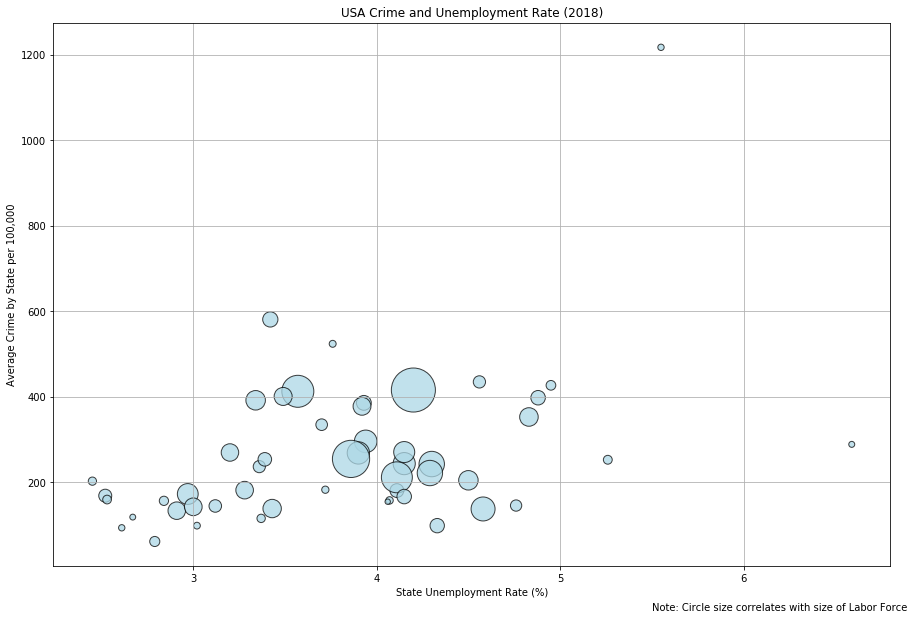

In [33]:
# Creat a bubble plot to factor in the labor force size into the scatter 
figsize, ax11 = plt.subplots(figsize=(figsize_x, figsize_y))
plt.scatter(mergeddf["State Unemployment Rate (%)"], mergeddf["Average Crime Rate"], marker="o", facecolors ="lightblue",edgecolors="black", 
             s=(mergeddf["Labor Force"]/10000), alpha=0.75)

plt.title ('USA Crime and Unemployment Rate (2018)')
plt.xlabel ('State Unemployment Rate (%)')
plt.ylabel ('Average Crime by State per 100,000')
plt.grid()

# Incorporate a text label regarding circle size
plt.text(5.5,-100,"Note: Circle size correlates with size of Labor Force")

# Save plot
plt.savefig("Bubble Plot.png")

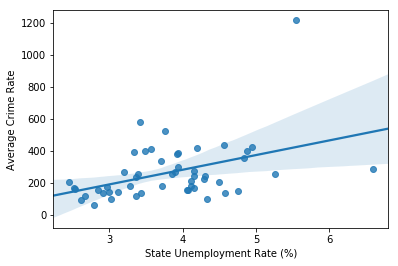

In [34]:
import seaborn as sns
#figsize, ax1 = plt.subplots(figsize=(figsize_x, figsize_y))
x = mergeddf["State Unemployment Rate (%)"]
y = mergeddf["Average Crime Rate"]
sns.regplot(x,y)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E08D1FFD0>,
      dtype=object)

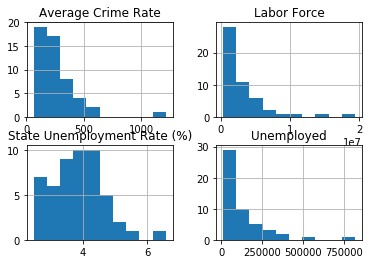

In [35]:
mergeddf.hist()

In [36]:
# Sort the merged data by state unemployment rate from lowest to highest
relevantsortxdf1 = mergeddf.drop(["Labor Force", "Unemployed"], axis=1).sort_values(["State Unemployment Rate (%)"], ascending=True).round(2)
relevantsortxdf1

,Average Crime Rate,State Unemployment Rate (%)
State,,
HI,203.0,2.45
IA,169.0,2.52
NH,160.0,2.53
ND,94.0,2.61
VT,119.0,2.67
NE,62.0,2.79
ID,157.0,2.84
MN,134.0,2.91
VA,173.0,2.97


In [37]:
relevantsortxdf1.describe()


,Average Crime Rate,State Unemployment Rate (%)
count,51.000000,51.000000
mean,264.666667,3.811569
std,180.948796,0.843228
min,62.000000,2.450000
25%,156.000000,3.240000
50%,222.000000,3.860000
75%,344.000000,4.245000
max,1217.000000,6.590000


In [38]:
# Sort the former dataframe by average crime rate from lowest to highest.
relevantsortydf1 = relevantsortxdf1.sort_values(["Average Crime Rate"], ascending=True)

# Display the dataframe.
relevantsortydf1

,Average Crime Rate,State Unemployment Rate (%)
State,,
NE,62.0,2.79
ND,94.0,2.61
SD,99.0,3.02
KY,99.0,4.33
ME,116.0,3.37
VT,119.0,2.67
MN,134.0,2.91
OH,138.0,4.58
IN,139.0,3.43


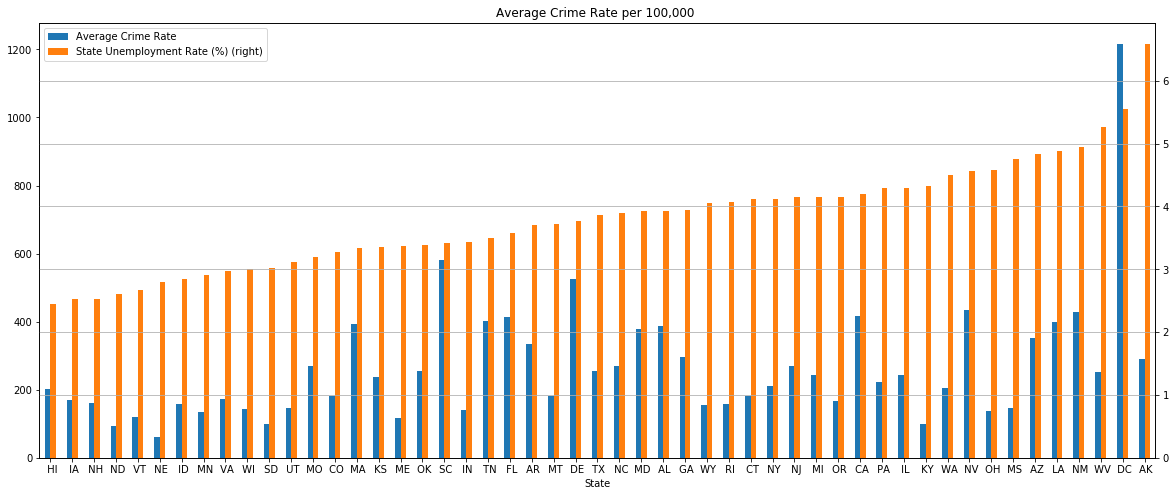

In [39]:
# Make a bar graph using sorted dataframe by unemployment rate.
gbar = relevantsortxdf1.plot( kind = 'bar',secondary_y = 'State Unemployment Rate (%)',figsize = (20,8), rot = 0 )
plt.grid()
plt.title("Average Crime Rate per 100,000 ")
plt.savefig("Sorted State Unemployment Rate vs. Crime Rate.png")

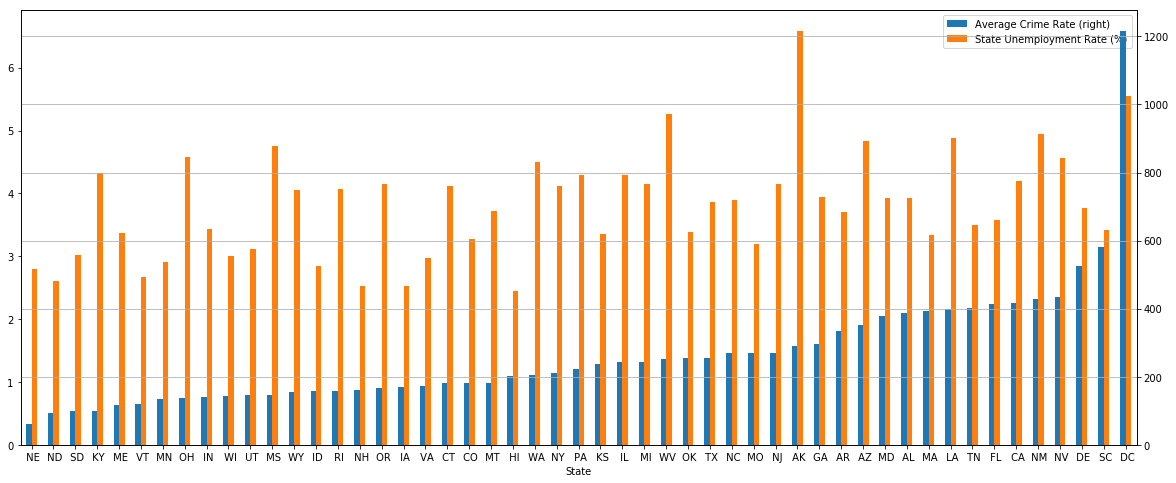

In [46]:
# Make a bar graph showing dataframe sorting average crime rate from lowest to highest vs. state unemployment rate.
gbar2=relevantsortydf1.plot( kind = 'bar',secondary_y = 'Average Crime Rate',figsize = (20,8), rot = 0,align = "center" )
plt.grid()
plt.savefig("Sorted Average Crime Rate vs. State Unemployment Rate.png")

In [47]:
intercept, slope = results.params
r2 = results.rsquared
print (slope, intercept, r2)

91.84677548075004 -85.41362128829417 0.18319199426379773


In [48]:
ACRbargraphdf = relevantsortydf1.reset_index()
ACRbargraphdf

,State,Average Crime Rate,State Unemployment Rate (%)
0,NE,62.0,2.79
1,ND,94.0,2.61
2,SD,99.0,3.02
3,KY,99.0,4.33
4,ME,116.0,3.37
5,VT,119.0,2.67
6,MN,134.0,2.91
7,OH,138.0,4.58
8,IN,139.0,3.43
9,WI,143.0,3.00


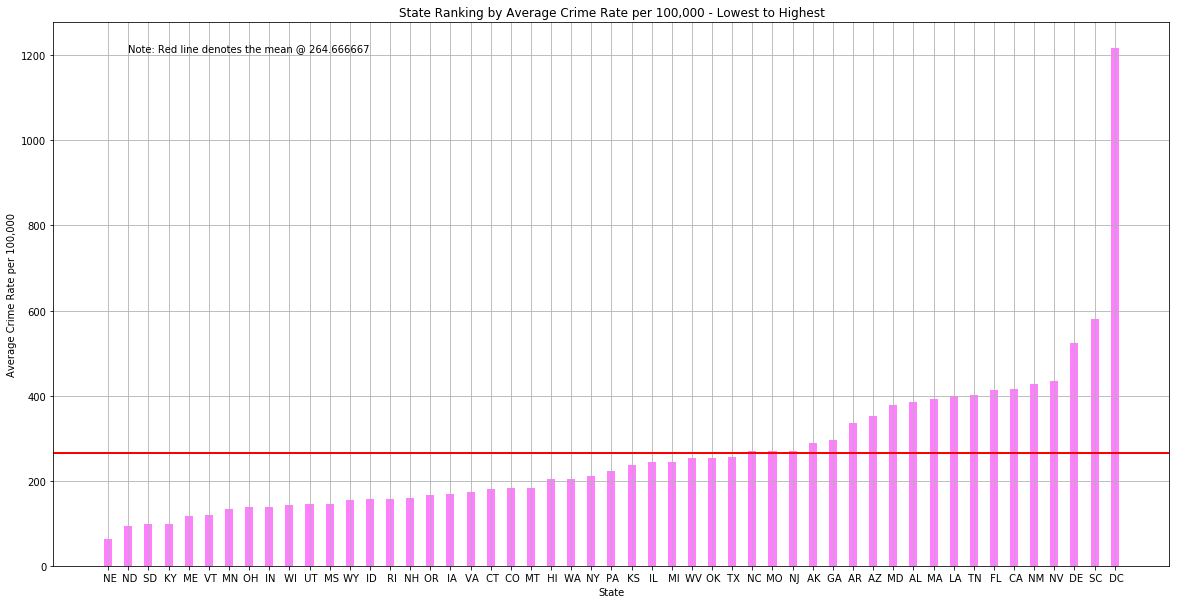

In [49]:
# Create a bar chart displaying State Ranking by Average Crime Rate per 100,000 Lowest to Highest
figsize_x = 20
figsize_y = 10
width = 0.4

fig, ax1 = plt.subplots(figsize=(figsize_x, figsize_y))
plt.title("State Ranking by Average Crime Rate per 100,000 - Lowest to Highest")
ax1.grid()
ax1.set_xlabel("State")
ax1.set_ylabel("Average Crime Rate per 100,000")
ax1.bar(ACRbargraphdf["State"], 
        ACRbargraphdf["Average Crime Rate"], 
        width=width, align='center', alpha=0.5, color='magenta')
ax1.axhline(y = 264.666667, linewidth = 2, color = "r")
plt.text(1,1210,"Note: Red line denotes the mean @ 264.666667")
# Save the Bar graph
plt.savefig("State Average Crime Rate Ranking - Bar Chart.png")

In [50]:
SUbargraphdf=relevantsortxdf1.reset_index()
SUbargraphdf

,State,Average Crime Rate,State Unemployment Rate (%)
0,HI,203.0,2.45
1,IA,169.0,2.52
2,NH,160.0,2.53
3,ND,94.0,2.61
4,VT,119.0,2.67
5,NE,62.0,2.79
6,ID,157.0,2.84
7,MN,134.0,2.91
8,VA,173.0,2.97
9,WI,143.0,3.00


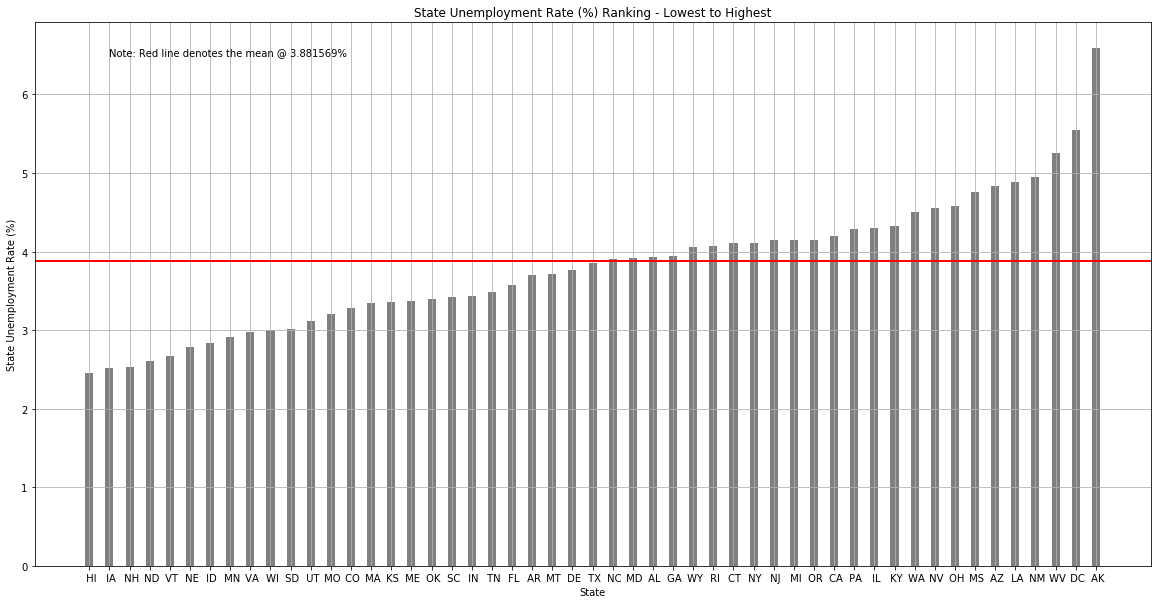

In [51]:
# Plot bar chart showing State Unemployment Rate from Lowest to Highest
figsize_x = 20
figsize_y = 10
width = 0.4

fig, ax2 = plt.subplots(figsize = (figsize_x, figsize_y))
plt.title("State Unemployment Rate (%) Ranking - Lowest to Highest")
ax2.grid()
ax2.set_xlabel("State")
ax2.set_ylabel("State Unemployment Rate (%)")
ax2.bar(SUbargraphdf["State"], 
        SUbargraphdf["State Unemployment Rate (%)"], 
        width  =width, align='center', alpha=0.5, color='black')
# Draw a red line on the mean
ax2.axhline(y = 3.881569, linewidth = 2, color = "r")
# Add text to explain red line
plt.text(1,6.5,"Note: Red line denotes the mean @ 3.881569%")
# Save the Bar graph
plt.savefig("State Unemployment Rate (%) Ranking - Bar Chart.png")